Reading in titanic train and test sets

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Taking a look at train and test

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


Getting to know each variable...

In [18]:
train['Survived'].value_counts() #fewer passengers survived than didn't... try modeling w/ and w/o sampling for more balance

0    549
1    342
Name: Survived, dtype: int64

In [25]:
train['Survived'].isnull().value_counts() #no missings as expected

False    891
Name: Survived, dtype: int64

In [24]:
train['Pclass'].isnull().value_counts() #no missings!

False    891
Name: Pclass, dtype: int64

In [16]:
train['Pclass'].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [23]:
train['Name'].isnull().value_counts() #no missings

False    891
Name: Name, dtype: int64

In [30]:
train['Sex'].value_counts() #more men than women in dataset

male      577
female    314
Name: Sex, dtype: int64

In [31]:
train['Sex'].isnull().value_counts() #no missings

False    891
Name: Sex, dtype: int64

In [34]:
train.groupby(['Sex','Survived']).count() #more females survived than males

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [39]:
train['Age'].min()

0.41999999999999998

In [37]:
train['Age'].max()

80.0

In [41]:
# train['Age'].isnull().value_counts() #177 null values - about 20%
(177/891)*100

19.865319865319865

In [42]:
train['SibSp'].value_counts() #number of siblings/spouses aboard - most were alone

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [44]:
train.groupby(['SibSp','Survived']).count()

PassengerId  Pclass  Name  Sex  Age  Parch  Ticket  Fare  \
SibSp Survived                                                             
0     0                 398     398   398  398  296    398     398   398   
      1                 210     210   210  210  175    210     210   210   
1     0                  97      97    97   97   86     97      97    97   
      1                 112     112   112  112   97    112     112   112   
2     0                  15      15    15   15   14     15      15    15   
      1                  13      13    13   13   11     13      13    13   
3     0                  12      12    12   12    8     12      12    12   
      1                   4       4     4    4    4      4       4     4   
4     0                  15      15    15   15   15     15      15    15   
      1                   3       3     3    3    3      3       3     3   
5     0                   5       5     5    5    5      5       5     5   
8     0                   7       7     7    7    0      7       7     7   

                Cabin  Embarked  
SibSp Survived                   
0     0            49       398  
      1            77       208  
1     0            17        97  
      1            52       112  
2     0             1        15  
      1             5        13  
3     0             1        12  
      1             2         4  
4     0             0        15  
      1             0         3  
5     0             0         5  
8     0             0         7

In [47]:
train['SibSp'].isnull().value_counts() #no missings

False    891
Name: SibSp, dtype: int64

In [45]:
train['Parch'].value_counts() #number of parents/children aboard

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [52]:
train.groupby(['Parch','Survived']).count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Ticket  Fare  \
Parch Survived                                                             
0     0                 445     445   445  445  335    445     445   445   
      1                 233     233   233  233  186    233     233   233   
1     0                  53      53    53   53   49     53      53    53   
      1                  65      65    65   65   61     65      65    65   
2     0                  40      40    40   40   29     40      40    40   
      1                  40      40    40   40   39     40      40    40   
3     0                   2       2     2    2    2      2       2     2   
      1                   3       3     3    3    3      3       3     3   
4     0                   4       4     4    4    4      4       4     4   
5     0                   4       4     4    4    4      4       4     4   
      1                   1       1     1    1    1      1       1     1   
6     0                   1       1     1    1    1      1       1     1   

                Cabin  Embarked  
Parch Survived                   
0     0            50       445  
      1            91       231  
1     0            11        53  
      1            28        65  
2     0             6        40  
      1            17        40  
3     0             0         2  
      1             0         3  
4     0             1         4  
5     0             0         4  
      1             0         1  
6     0             0         1

In [48]:
train['Parch'].isnull().value_counts() #no missings

False    891
Name: Parch, dtype: int64

In [53]:
train['Ticket'].isnull().value_counts() #no missings

False    891
Name: Ticket, dtype: int64

In [54]:
train[['Ticket']].head() #do the letters have any significance?

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450


(array([ 732.,  106.,   31.,    2.,   11.,    6.,    0.,    0.,    0.,    3.]),
 array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
         256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
         512.3292 ]),
 <a list of 10 Patch objects>)

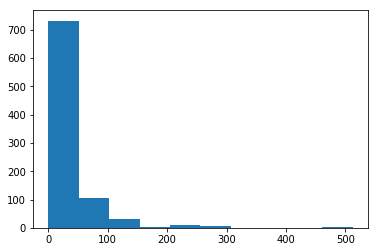

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(train['Fare']) #most fares on the cheaper side. currency...?

In [59]:
train['Fare'].isnull().value_counts() #no missings

False    891
Name: Fare, dtype: int64

In [61]:
# train['Cabin'].value_counts() #147 different cabins

In [63]:
# train['Cabin'].isnull().value_counts() #687 missing - 77%
(687/891)*100

77.10437710437711

In [64]:
train['Embarked'].value_counts() #port where passenger embarked - Southampton, Queenstown, Cherbourg

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [65]:
train['Embarked'].isnull().value_counts() #only 2 missing values

False    889
True       2
Name: Embarked, dtype: int64